# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

age gender city_type  full_mob  ml_balance  cl_balance_0m  loan_balance_0m  \
0   71    NaN      <100       103         0.0            0.0              0.0   
1   49    NaN      Mega        81         0.0            0.0              0.0   
2   56    NaN      Mega        81         0.0            0.0              0.0   
3   47    NaN      Mega        81         0.0            0.0              0.0   
4   74    NaN      Mega        81         0.0            0.0              0.0   

   td_balance_0m  casa_balance_0m  dc_trx_cnt  ...  min_loan_balance_1q  \
0            0.0           0.0000           0  ...                  0.0   
1            0.0        3272.9367           0  ...                  0.0   
2            0.0        6249.7550           6  ...                  0.0   
3            0.0       14354.9370           0  ...                  0.0   
4            0.0       91511.7691           0  ...                  0.0   

   max_loan_balance_1q  avg_loan_balance_1Y  min_cl_balance_1q  \
0                  0.0                  0.0                0.0   
1                  0.0                  0.0                0.0   
2                  0.0                  0.0                0.0   
3                  0.0                  0.0                0.0   
4                  0.0                  0.0                0.0   

   max_cl_balance_1q  avg_cl_balance_1Y  loan_to_deposit  Avg_trx  \
0                0.0                0.0              NaN      NaN   
1                0.0                0.0              NaN      NaN   
2                0.0                0.0              NaN   854.67   
3                0.0                0.0              NaN      NaN   
4                0.0                0.0              NaN      NaN   

   avgtrx_to_balance          nbi  
0                NaN          NaN  
1                NaN    28.762952  
2           0.083467  1973.335539  
3                NaN   364.008556  
4                NaN  6651.416562  

[5 rows x 28 columns]

## Линейная

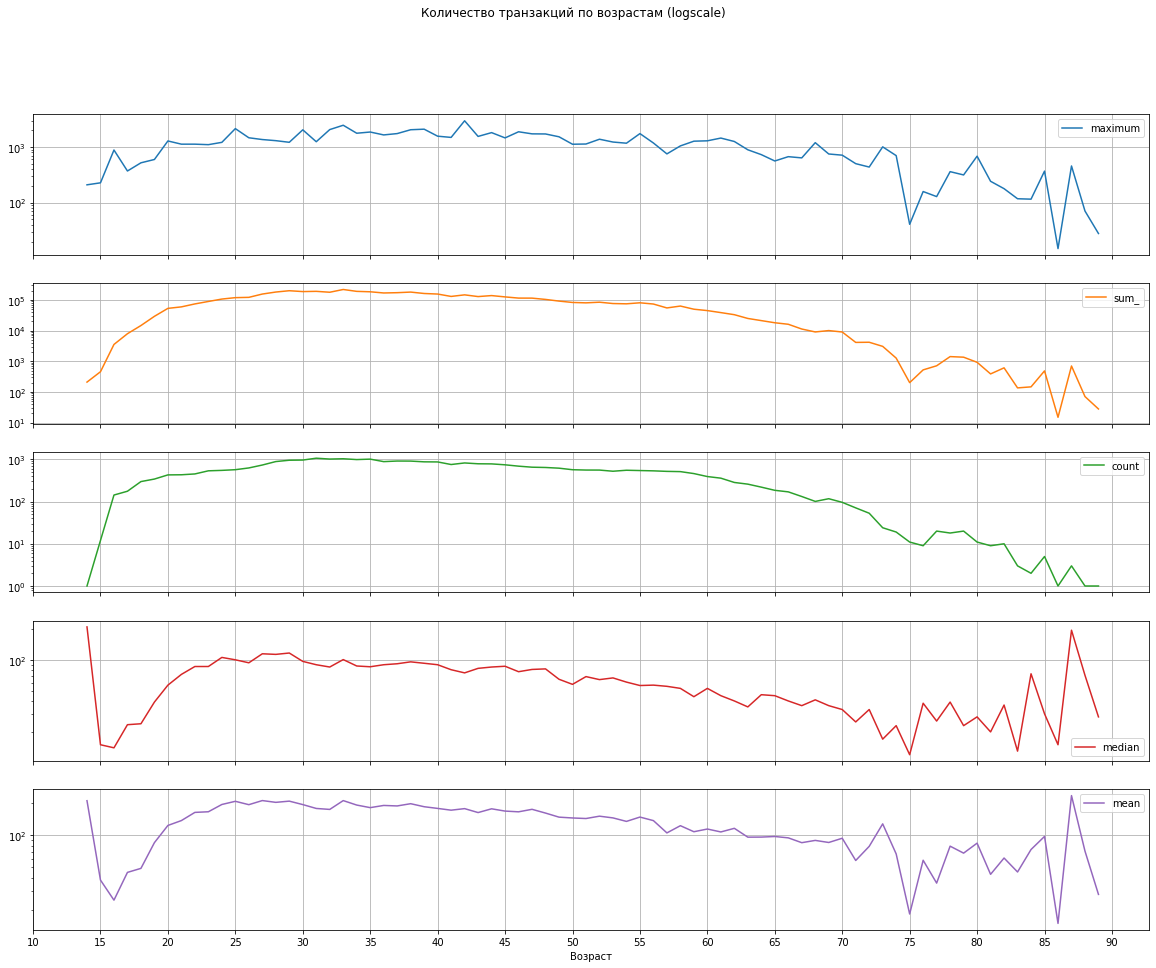

In [3]:
# создаём DF с аггрегированными данными по количеству транзакций в разрезе возрастов
df_trx_cnt = df[df.dc_trx_cnt > 0].groupby(by='age').agg(maximum=('dc_trx_cnt','max'),
                                                        sum_=('dc_trx_cnt','sum'),
                                                        count=('dc_trx_cnt','count'), 
                                                        median=('dc_trx_cnt','median'), 
                                                        mean=('dc_trx_cnt','mean'))

df_trx_cnt.plot(subplots=True,
                        xlabel='Возраст',
                        figsize=(20, 15),
                        grid=True,
                        xticks=[i*5 for i in range(2,19)],
                        legend=True, 
                        logy=True,
                        title='Количество транзакций по возрастам (logscale)')
plt.show()

## Рассеивания

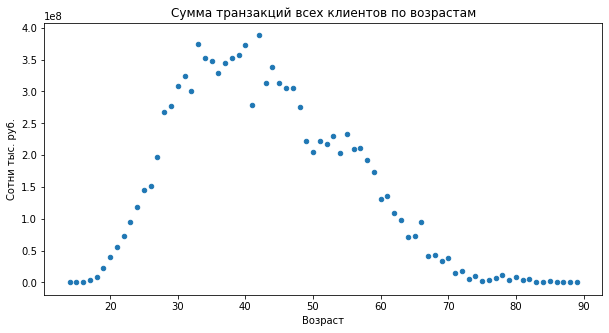

In [4]:
df_trx_sum = df[df.dc_trx_sum > 0].groupby(by='age', as_index=False).agg(
                                                        maximum=('dc_trx_sum','max'),
                                                        median=('dc_trx_sum','median'), 
                                                        mean=('dc_trx_sum','mean'),
                                                        sum_=('dc_trx_sum','sum'),
                                                        count=('dc_trx_sum','count'))
# df_trx_sum
df_trx_sum.plot(kind='scatter', x='age', y='sum_', title='Сумма транзакций всех клиентов по возрастам', figsize=(10, 5))
plt.ylabel(ylabel='Сотни тыс. руб.')
plt.xlabel(xlabel='Возраст')
plt.show()

## Столбчатая и гистограмма

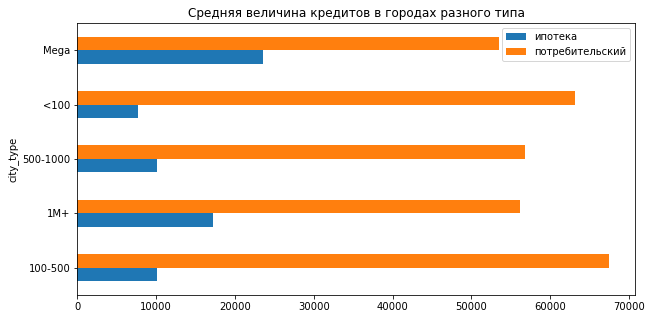

In [5]:
df.groupby(by='city_type').agg(
    ипотека=('ml_balance', 'mean'),
    потребительский=('cl_balance_0m', 'mean')).plot(
        kind='barh',
        legend=True,
        title='Средняя величина кредитов в городах разного типа', 
        figsize=(10, 5))
plt.show()

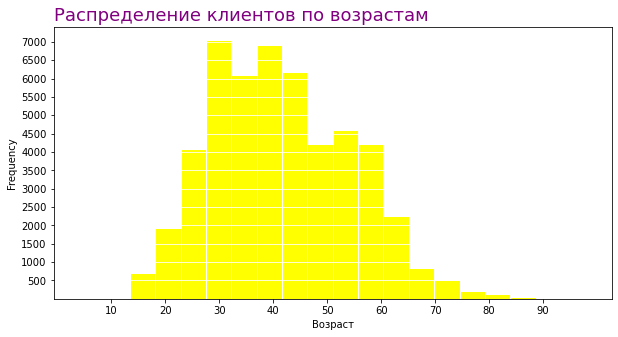

In [6]:
df['age'].plot(kind='hist', 
               bins=20, 
               edgecolor='white', 
               figsize=(10, 5), 
               xticks=[i*10 for i in range(1,10)],
               yticks=[i*500 for i in range(1,15)],
               color='yellow')
plt.title(label='Распределение клиентов по возрастам', color='purple', fontsize=18, loc='left')
plt.xlabel('Возраст')
plt.grid(axis='y', color='white')
plt.show()

## Круговая диаграмма

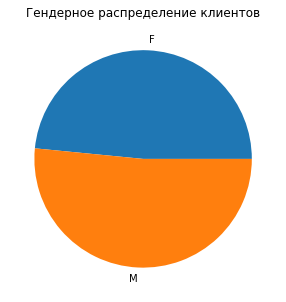

In [7]:
gender = df.groupby(by='gender').agg(amount=('age', 'count'))
gender.plot(kind='pie', figsize=(10, 5), y='amount', ylabel='', legend=False)
plt.title(label='Гендерное распределение клиентов')
plt.show()

# SEABORN

## Relational Plots

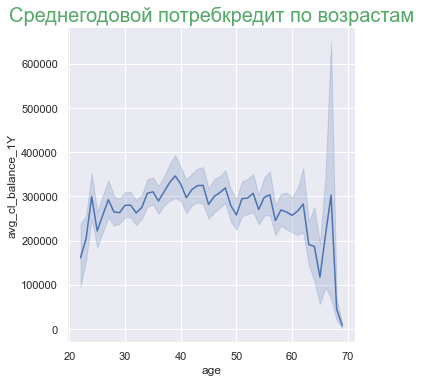

In [8]:
# Линейная диаграмма
sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='avg_cl_balance_1Y',
    data=df.query("avg_cl_balance_1Y > 0"), 
    kind='line'
)
plt.title('Среднегодовой потребкредит по возрастам', size=20, color='g');

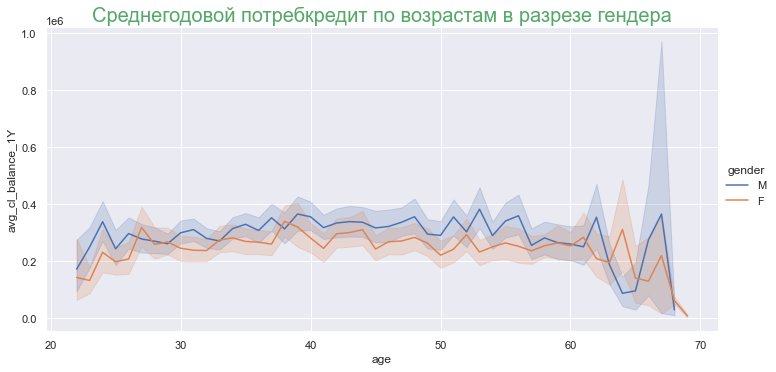

In [9]:
# Линейная диаграмма c HUE
sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='avg_cl_balance_1Y',
    hue='gender',
    data=df.query("avg_cl_balance_1Y > 0"), 
    kind='line',
    height=5,
    aspect=2
)
plt.title('Среднегодовой потребкредит по возрастам в разрезе гендера', size=20, color='g');

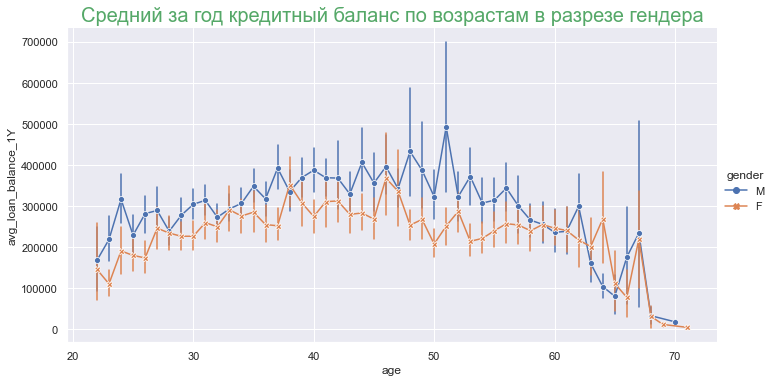

In [10]:
# Линейная диаграмма c STYLE и BAR
sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='avg_loan_balance_1Y',
    hue='gender',
    style='gender',
    err_style="bars",
    kind='line', 
    dashes=False, 
    markers=True,
    data=df.query("avg_loan_balance_1Y > 0"),
    ci=90,
    height=5,
    aspect=2
)
plt.title('Средний за год кредитный баланс по возрастам в разрезе гендера', size=20, color='g');

In [11]:
# LONG формат
df_long = pd.melt(df[['age', 'gender', 'city_type', 'full_mob', 'dc_trx_cnt', 'avg_loan_balance_1Y', 'dc_trx_sum']], 
                  var_name='item', 
                  value_name='amount',
                  id_vars=['age', 'gender', 'city_type', 'full_mob', 'dc_trx_cnt'])
df_long.shape

(100000, 7)

In [12]:
df[df.age == 28]['avg_casa_balance_1Y'].sum()

31225476.467915095

In [13]:
df_long_gr = df_long.groupby(by=['age', 'gender', 'city_type', 'item']).sum()
df_long_gr.head(5)

full_mob  dc_trx_cnt  amount
age gender city_type item                                             
4   F      100-500   avg_loan_balance_1Y         2           0     0.0
                     dc_trx_sum                  2           0     0.0
8   F      100-500   avg_loan_balance_1Y         8           0     0.0
                     dc_trx_sum                  8           0     0.0
    М      100-500   avg_loan_balance_1Y         2           0     0.0

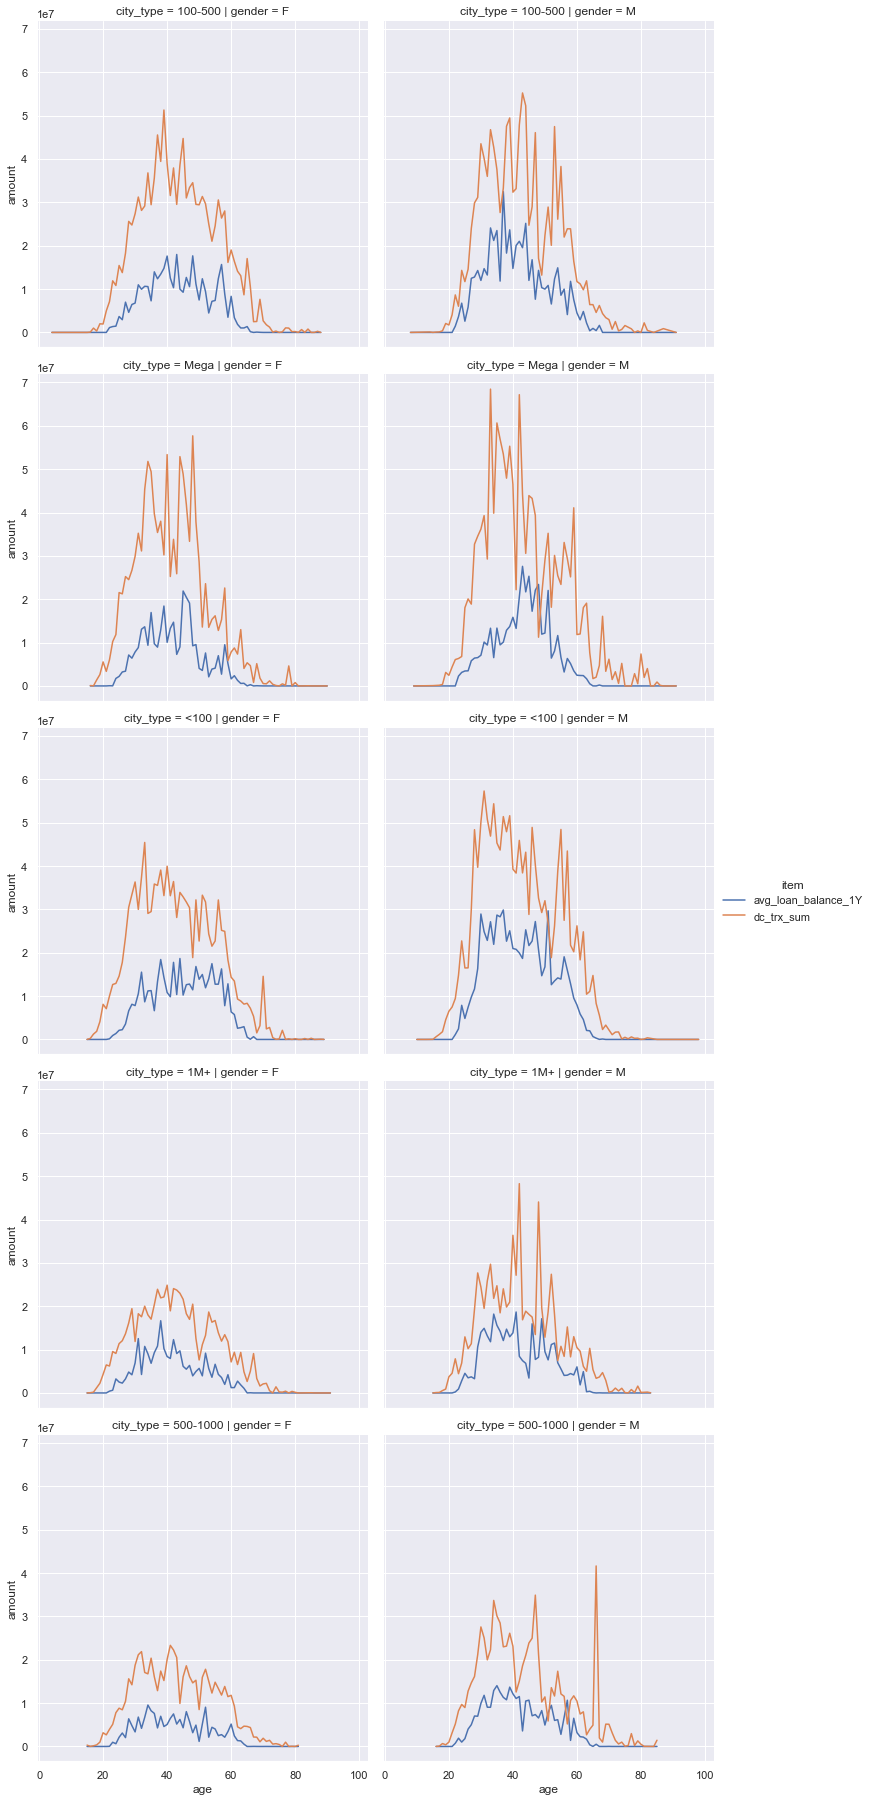

In [14]:
g = sns.relplot(
    x='age', 
    y='amount', 
    data=df_long_gr, 
    kind='line', 
    hue='item', 
    row='city_type', 
    col='gender')

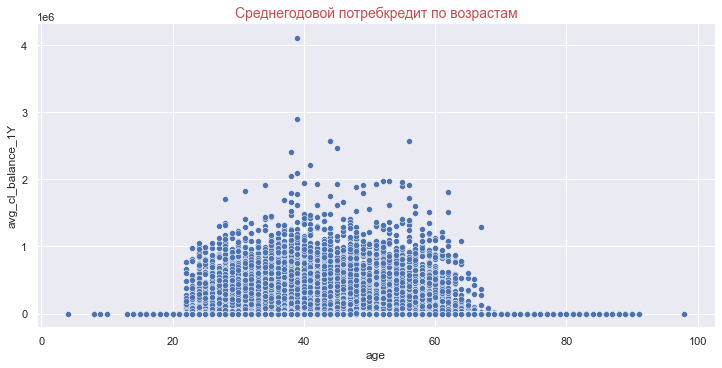

In [15]:
# Диаграмма рассеяния
sns.relplot(
    x='age', 
    y='avg_cl_balance_1Y',
    data=df,
    height=5,
    aspect=2
)
plt.title('Среднегодовой потребкредит по возрастам', size=14, color='r');

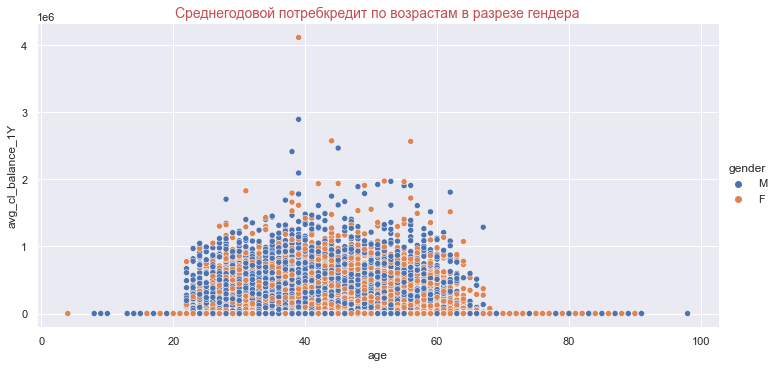

In [16]:
# Диаграмма рассеяния с HUE
sns.relplot(
    x='age', 
    y='avg_cl_balance_1Y',
    hue='gender',
    data=df,
    height=5,
    aspect=2
)
plt.title('Среднегодовой потребкредит по возрастам в разрезе гендера', size=14, color='r');

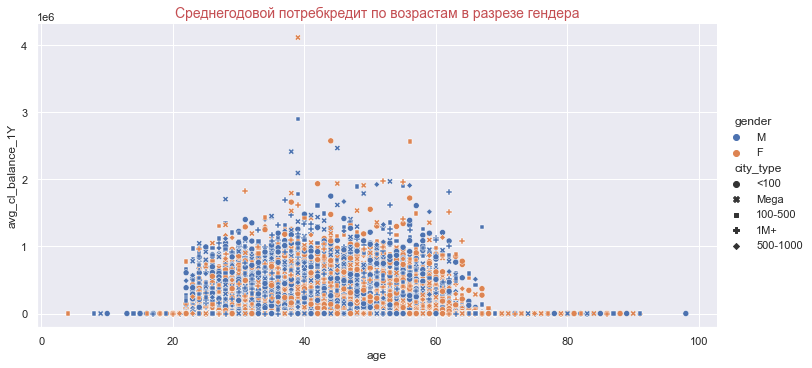

In [17]:
# Диаграмма рассеяния с HUE и STYLE
sns.relplot(
    x='age', 
    y='avg_cl_balance_1Y',
    hue='gender',
    data=df,
    style='city_type',
    height=5,
    aspect=2
)
plt.title('Среднегодовой потребкредит по возрастам в разрезе гендера', size=14, color='r');

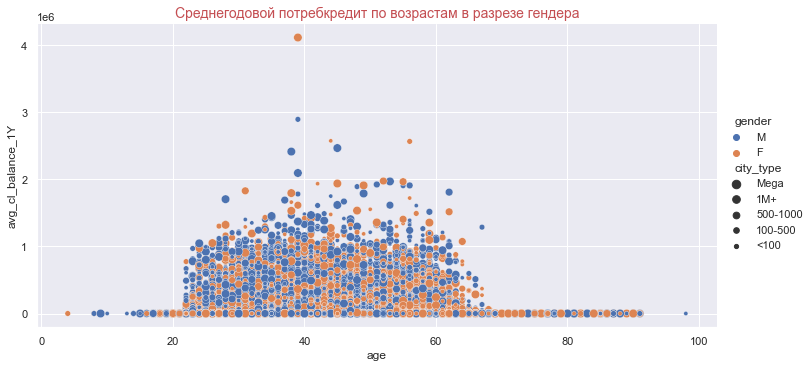

In [18]:
# Диаграмма рассеяния с HUE и SIZE и дополнительными переменными
city_order = ['Mega', '1M+', '500-1000', '100-500', '<100']
sns.relplot(
    x='age', 
    y='avg_cl_balance_1Y',
    hue='gender',
    data=df,
    size='city_type',
    size_order=city_order,
    height=5,
    aspect=2
)
plt.title('Среднегодовой потребкредит по возрастам в разрезе гендера', size=14, color='r');

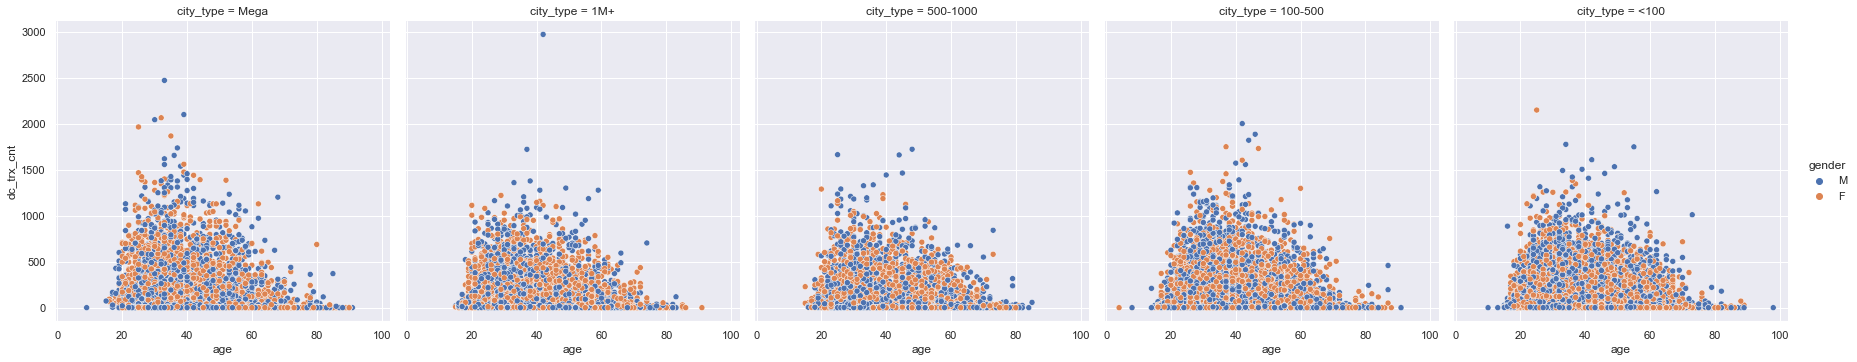

In [19]:
sns.relplot(
    x='age', 
    y='dc_trx_cnt',
    hue='gender',
    data=df,
    col='city_type',
    col_order=city_order,
    height=5
)
# plt.title('Количество транзакций по возрастам в разрезе гендера', size=14, color='r');

## Категорийные диаграммы

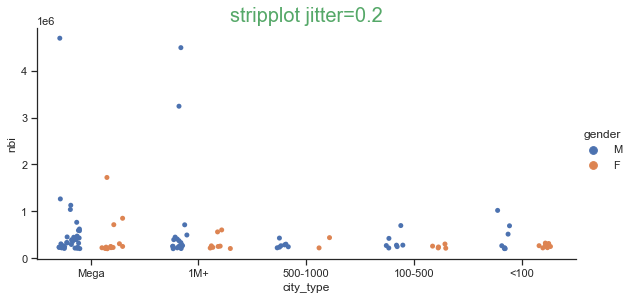

In [20]:
sns.set(style="ticks", color_codes=True)

sns.catplot(
    x='city_type',
    y='nbi', 
    data=df[df.nbi > 200000], 
    hue='gender',
    order=city_order, 
    jitter=0.2,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True) 

plt.title('stripplot jitter=0.2', size=20, color='g');

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


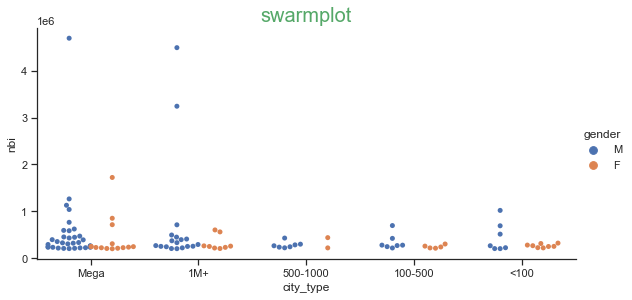

In [21]:
sns.set(style="ticks", color_codes=True)

sns.catplot(
    x='city_type',
    y='nbi', 
    data=df[df.nbi > 200000], 
    hue='gender',
    order=city_order,
    height=4, 
    aspect=2, 
    kind='swarm', 
    dodge=True) 

plt.title('swarmplot', size=20, color='g');

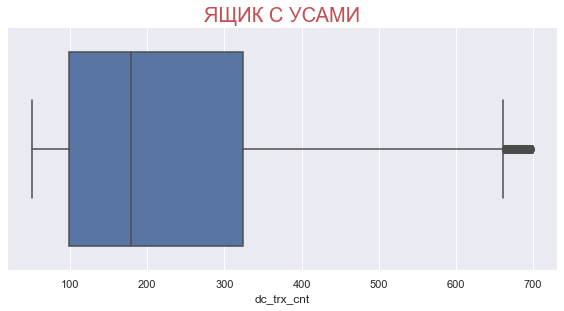

In [22]:
sns.set(style='darkgrid')
sns.catplot(
    x='dc_trx_cnt', 
    data=df[(df.dc_trx_cnt > 50) & (df.dc_trx_cnt < 700)], 
    kind='box', 
    height=4, 
    aspect=2
)

plt.title('ЯЩИК С УСАМИ', size=20, color='r');

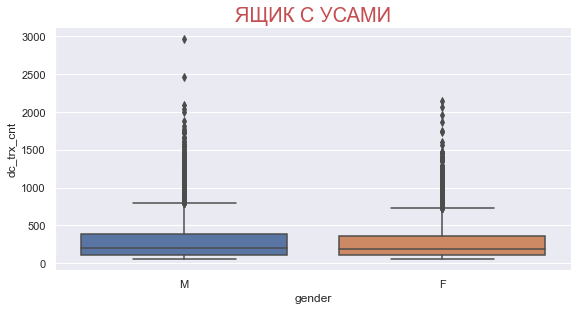

In [23]:
sns.set(style='darkgrid')
sns.catplot(
    x='gender',
    y='dc_trx_cnt',
    data=df[df.dc_trx_cnt > 50], 
    kind='box',
    height=4, 
    aspect=2
)

plt.title('ЯЩИК С УСАМИ', size=20, color='r');

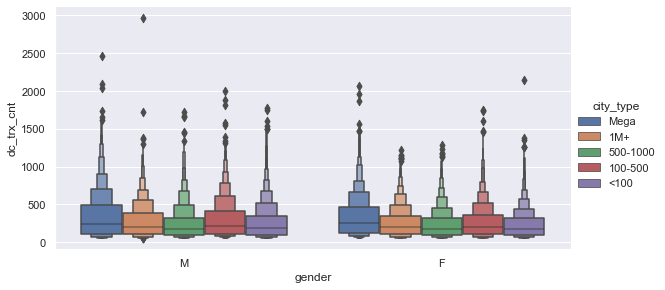

In [24]:
sns.catplot(
    x='gender',
    y='dc_trx_cnt',
    data=df[df.dc_trx_cnt > 50], 
    kind='boxen',
    hue='city_type',
    hue_order=city_order,
    height=4, 
    aspect=2
);

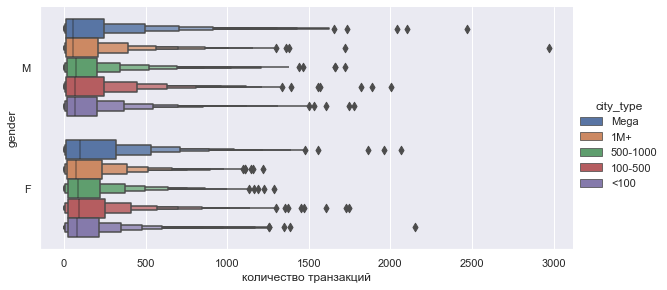

In [25]:
sns.catplot(
    y='gender',
    x='dc_trx_cnt',
    data=df[df.dc_trx_cnt > 0], 
    kind='boxen',
    hue='city_type',
    hue_order=city_order,
    height=4, 
    aspect=2
)
plt.xlabel(xlabel='количество транзакций');

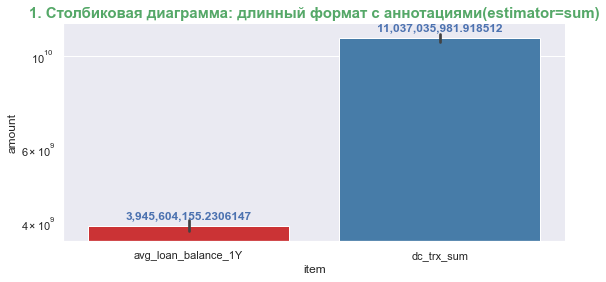

In [26]:
plt.figure(figsize=(9,4))
b = sns.barplot(
    x='item', 
    y='amount', 
    data=df_long, 
    estimator=sum,
    palette="Set1")

b.set(yscale='log')
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )

plt.title('1. Столбиковая диаграмма: длинный формат с аннотациями(estimator=sum)', size=15, color='g', 
          weight='bold');

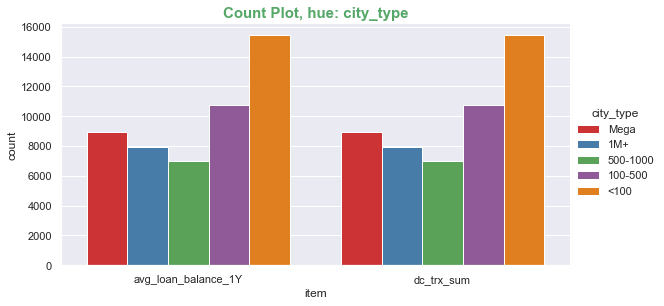

In [27]:
sns.catplot(
    x='item', 
    data=df_long, 
    kind='count',
    hue='city_type', 
    hue_order=city_order, 
    palette='Set1', 
    height=4, 
    aspect=2); 
plt.title('Count Plot, hue: city_type', size=15, color='g', weight='bold');

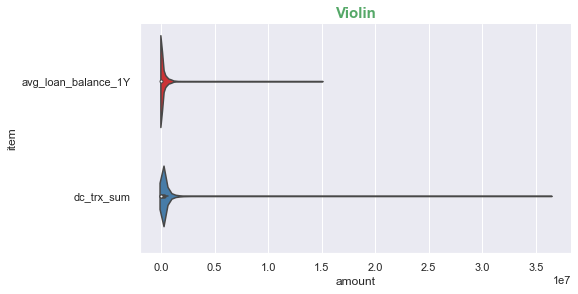

In [28]:
sns.catplot(
    x='amount',
    y='item',
    data=df_long, 
    kind='violin', 
    palette='Set1', 
    height=4, 
    aspect=2); 
plt.title('Violin', size=15, color='g', weight='bold');

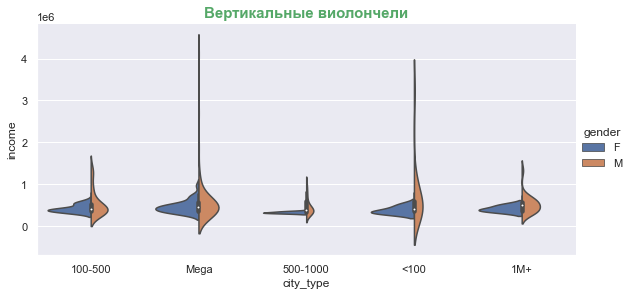

In [29]:
sns.catplot(
    x='city_type', 
    y='income', 
    data=df.query('(income > 300000) & (income < 5000000)'), 
    kind='violin',
    hue='gender',
    split=True, 
    height=4, 
    aspect=2) 

plt.title('Вертикальные виолончели', size=15, color='g', weight='bold');

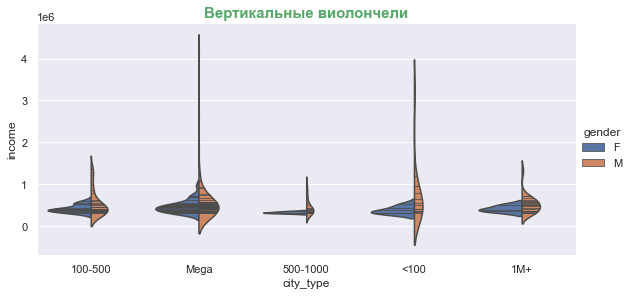

In [30]:
sns.catplot(
    x='city_type', 
    y='income', 
    data=df.query('(income > 300000) & (income < 5000000)'), 
    kind='violin',
    hue='gender',
    inner="stick",
    split=True, 
    height=4, 
    aspect=2) 

plt.title('Вертикальные виолончели', size=15, color='g', weight='bold');

In [31]:
trx_cnt_city = df[df.dc_trx_cnt > 0].groupby(by=['gender', 'age', 'city_type'], as_index=False).agg(
                                                        minimum=('dc_trx_cnt','min'),
                                                        median=('dc_trx_cnt','median'), 
                                                        mean=('dc_trx_cnt','mean'), 
                                                        maximum=('dc_trx_cnt','max'))

trx_cnt_city_long = pd.melt(trx_cnt_city, 
                  var_name='agg', 
                  value_name='value',
                  id_vars=['gender' ,'age', 'city_type'])
trx_cnt_city_long

gender  age city_type      agg  value
0         F   15       1M+  minimum    8.0
1         F   15  500-1000  minimum   48.0
2         F   15      <100  minimum    8.0
3         F   16   100-500  minimum    1.0
4         F   16       1M+  minimum    1.0
...     ...  ...       ...      ...    ...
2659      М   83       1M+  maximum  118.0
2660      М   85  500-1000  maximum   57.0
2661      М   85      Mega  maximum  370.0
2662      М   86      Mega  maximum   15.0
2663      М   87   100-500  maximum  458.0

[2664 rows x 5 columns]

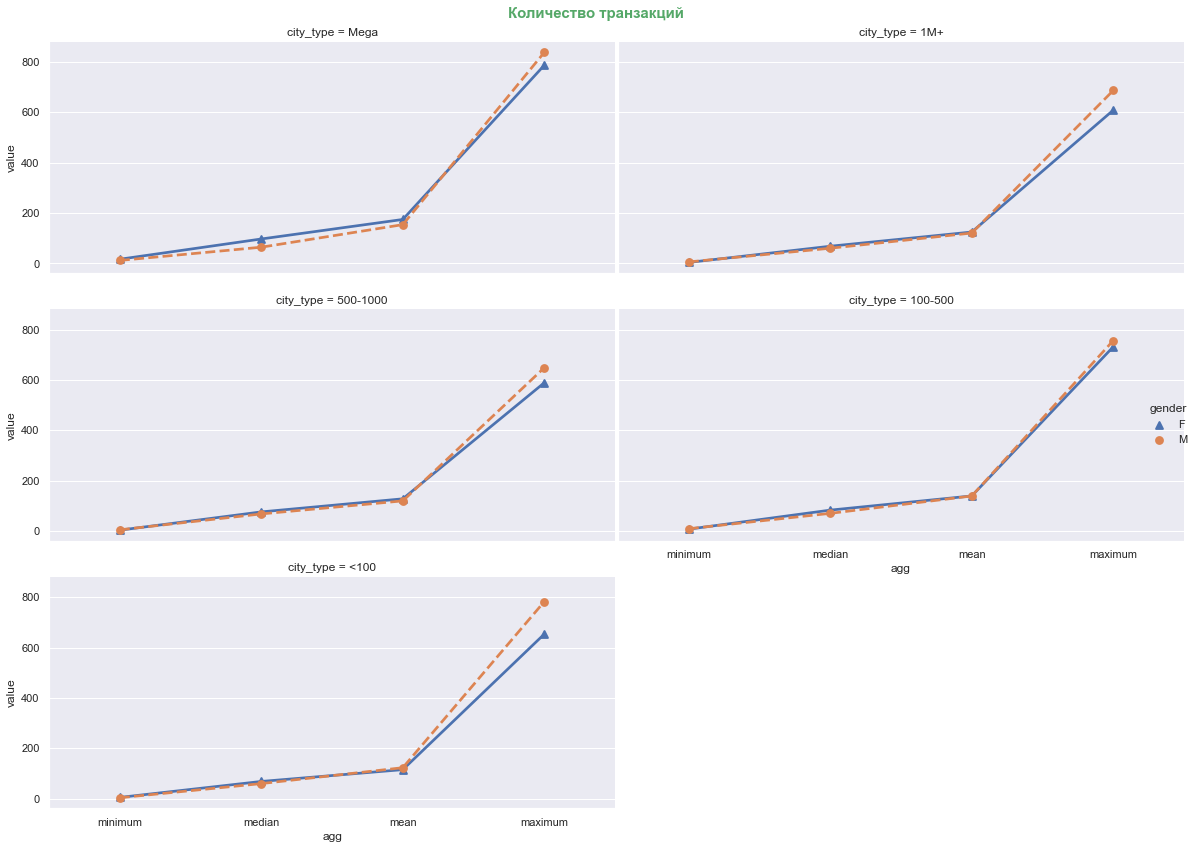

In [32]:
sns.catplot(
    x='agg', 
    y='value', 
    data=trx_cnt_city_long, 
    kind='point', 
    ci=None,
    hue='gender',
    markers=["^", "o"], 
    linestyles=["-", "--"],
    col='city_type', 
    col_wrap=2,
    col_order=city_order,
    height=4, 
    aspect=2)
plt.suptitle('Количество транзакций', size=15, color='g', weight='bold');
plt.tight_layout(pad=1,w_pad=0.25, h_pad=0.25);

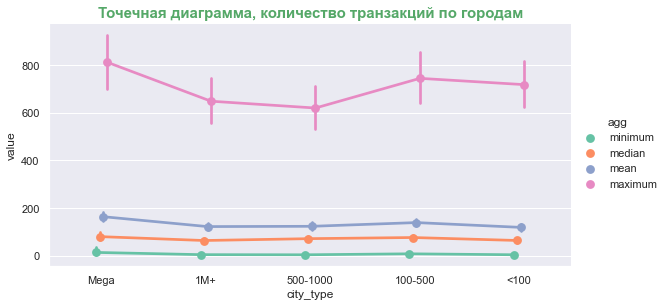

In [33]:
sns.catplot(
    x='city_type', 
    y='value', 
    data=trx_cnt_city_long, 
    kind='point', 
    hue='agg',
    dodge=True,
    ci=99,
#     hue_order=, 
    palette="Set2", 
    order=city_order, 
    height=4, 
    aspect=2)
plt.title('Точечная диаграмма, количество транзакций по городам', size=15, color='g', weight='bold');

## Диаграммы распределения

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


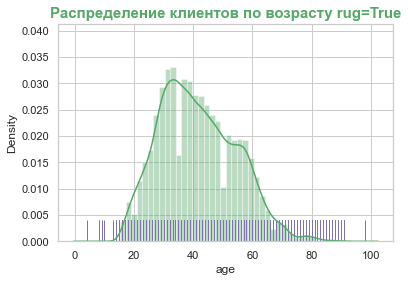

In [34]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.age,
    color='g', 
    rug=True, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('Распределение клиентов по возрасту rug=True', size=15, color='g', weight='bold')
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


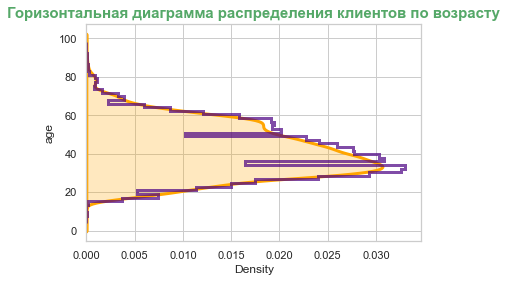

In [35]:
sns.distplot(
    df.age,
    vertical=True,
    hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
    kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"})           
plt.title('Горизонтальная диаграмма распределения клиентов по возрасту', size=15, color='g', weight='bold')             
plt.show()

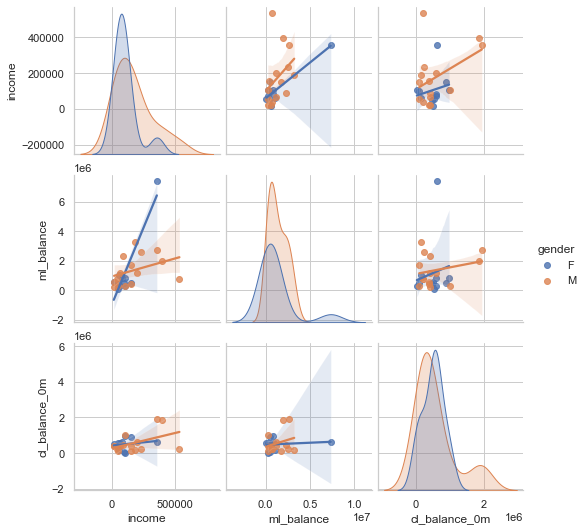

In [36]:
df_items = df.loc[:,['income', 'ml_balance', 'cl_balance_0m', 'gender']]
df_items=df_items[(df_items.income>0)&(df_items.ml_balance>0)&(df_items.cl_balance_0m>0)]

sns.pairplot(
    df_items,
    hue='gender',
    kind='reg'
)
plt.show();

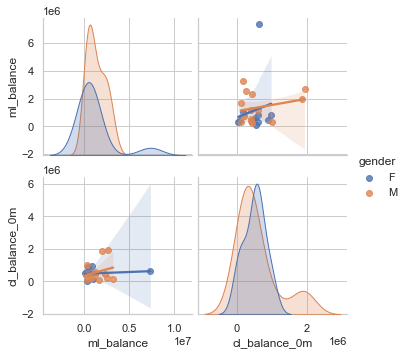

In [37]:
sns.pairplot(
    df_items,
    vars=['ml_balance', 'cl_balance_0m'],
    hue='gender',
    kind='reg')
plt.show()

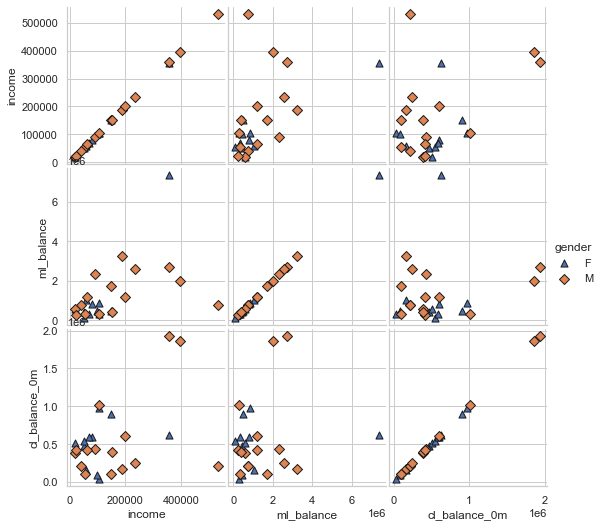

In [38]:
g = sns.PairGrid(
    df_items, 
    hue='gender', 
    hue_kws={"marker": ["^", "D"]}
)
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

## Матричные диаграммы

In [39]:
# создаём сводную таблицу
df1_long = pd.melt(df[['age', 
                       'gender', 
                       'city_type', 
                       'full_mob', 'dc_trx_cnt', 
                       'avg_loan_balance_1Y', 
                       'dc_trx_sum', 
                       'avg_casa_balance_1Y', 
                       'avg_td_balance_1Y']], 
                  var_name='item', 
                  value_name='amount',
                  id_vars=['age', 'gender', 'city_type', 'full_mob', 'dc_trx_cnt'])
df1 = df1_long.groupby(['item', 'city_type']).amount.mean()
df1 = df1.reset_index()
df1 = df1.pivot('city_type','item', 'amount')
df1 = df1.reindex(city_order)
df1.head()

item       avg_casa_balance_1Y  avg_loan_balance_1Y  avg_td_balance_1Y  \
city_type                                                                
Mega             164969.989349         86426.739978      185720.608000   
1M+              102265.391860         77612.187775       63694.722589   
500-1000          33471.984446         70358.961689       47998.217621   
100-500           38987.833331         85144.700506       53769.475982   
<100              22034.420114         74756.864017       30947.344574   

item          dc_trx_sum  
city_type                 
Mega       310832.201518  
1M+        192437.293998  
500-1000   204275.195062  
100-500    234040.814211  
<100       181156.273981

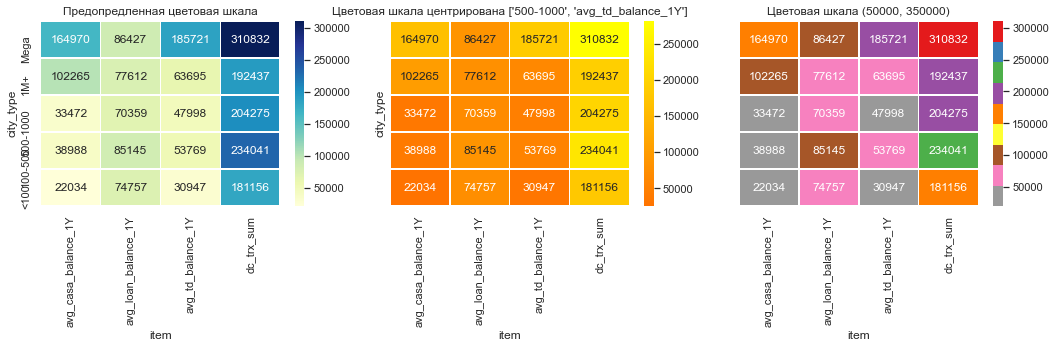

In [40]:
# Set up axes on which to plot various plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

sns.heatmap(
    df1, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu",
    ax=ax1)
ax1.set_title('Предопредленная цветовая шкала')

sns.heatmap(
    df1, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    robust=True,
    cmap="autumn", 
    center=df1.loc['500-1000', 'avg_td_balance_1Y'], 
    yticklabels=False, 
    ax=ax2)

ax2.set_title("Цветовая шкала центрирована ['500-1000', 'avg_td_balance_1Y']")

sns.heatmap(
    df1, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    robust=True, 
    vmin=20000, 
    vmax=311000,
    cmap='Set1_r', 
    yticklabels=False, 
    ax=ax3)
ax3.set(title='Цветовая шкала (50000, 350000)', ylabel='')

plt.tight_layout()
plt.show()

In [41]:
df2 = df[df.nbi > 0]
df2 = df2[['dc_trx_cnt', 'dc_trx_sum', 'income', 
           'avg_casa_balance_1Y', 'avg_td_balance_1Y', 
           'avg_loan_balance_1Y', 'avg_cl_balance_1Y', 'Avg_trx', 'nbi']]
df2.Avg_trx = df2.Avg_trx.fillna(value=0)

In [42]:
corr = df2.corr()

In [43]:
mask = np.zeros_like(corr)

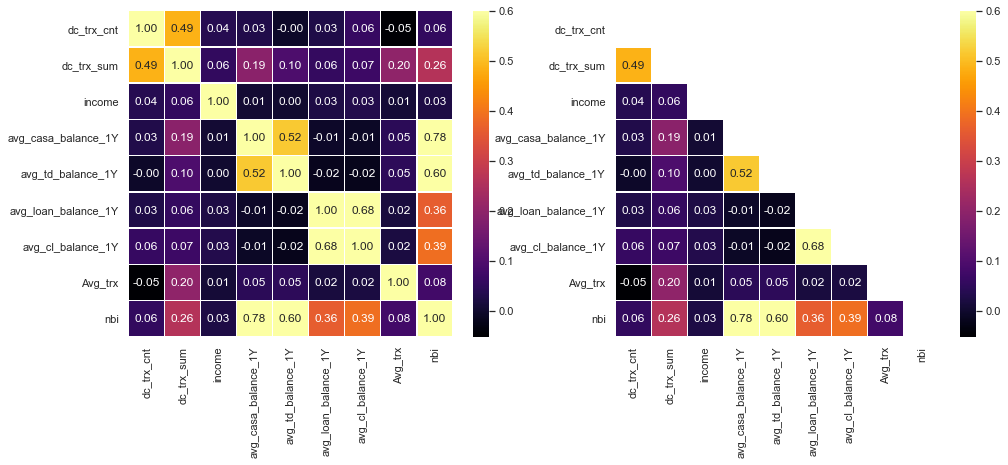

In [44]:
mask[np.triu_indices_from(mask)] = True

fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,6))
sns.heatmap(corr, vmax=.6, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax1)
sns.heatmap(corr, mask=mask, vmax=.6, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax2)
plt.show()

# PLOTLY

In [45]:
px.scatter(x=df_trx_cnt.index, y=df_trx_cnt.maximum, labels={'x':'AGE', 'y':'MAX_TRX_COUNT'}).show()

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_trx_cnt.index, y=df_trx_cnt['mean'], name='Среднее'))
fig.add_trace(go.Scatter(x=df_trx_cnt.index, y=df_trx_cnt['median'], mode='lines+markers', name='Медиана'))
fig.update_layout(legend_orientation="h", 
                  margin=dict(l=10, r=10, t=25, b=10),
                  title="Среднее и медианное количество транзакций по возрастам",
                  xaxis_title="Возраст",
                  yaxis_title="Кол-во транзакций",)
fig.show()

In [50]:
df_city_types = df.groupby(by='city_type').agg(num_clients=('age', 'count'))
df_city_types = df_city_types.reindex(city_order)

In [51]:
fig = go.Figure()
fig.add_trace(go.Pie(values=df_city_types.num_clients, labels=df_city_types.index, sort = False, hole=0.7))
fig.update_layout(
    annotations=[dict(text='Распределение<br>клиентов<br>по типам городов', x=0.5, y=0.5, font_size=20, showarrow=False)], 
    title="Пример кольцевой/круговой диаграммы", 
    title_x = 0.5, # центрирование заголовка
)
fig.show()